In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from scipy import misc

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
datasetCopy=df.copy()
for c in datasetCopy.columns:
    labels=datasetCopy[c].astype('category').cat.categories.tolist()
    replace_map_c={c: {k:v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
    datasetCopy.replace(replace_map_c,inplace = True)
datasetCopy = datasetCopy.dropna()
datasetCopy

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,...,Origin,Type,"latitude, longitude",SVF,Res_SVF,rating_bool,price_bool,if_success,locRat,OriginRat
0,4622.0,42.0,0,0,5.0,5.0,6.0,743,5.0,1,...,4,71.0,54.0,14.0,1,1,0,1,1,1
1,1011.0,19.0,0,1,5.0,5.0,6.0,0,5.0,1,...,4,79.0,37.0,14.0,1,1,1,1,0,1
2,279.0,41.0,0,0,5.0,4.0,5.0,821,5.0,1,...,52,53.0,52.0,12.0,1,1,0,1,1,0
3,628.0,15.0,0,1,5.0,5.0,5.0,1342,5.0,1,...,34,79.0,21.0,13.0,1,1,1,1,1,1
4,2549.0,19.0,0,0,5.0,5.0,6.0,1704,5.0,1,...,49,4.0,37.0,14.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,4649.0,29.0,0,1,5.0,5.0,5.0,1965,5.0,1,...,4,79.0,30.0,13.0,1,1,1,1,1,1
5910,4637.0,16.0,0,0,5.0,5.0,5.0,1941,5.0,1,...,47,53.0,60.0,13.0,1,1,0,1,0,1
5911,4654.0,43.0,0,1,4.0,4.0,4.0,2508,4.0,1,...,4,79.0,64.0,10.0,0,0,1,0,0,1
5912,4623.0,70.0,0,0,4.0,3.0,4.0,1719,3.0,1,...,4,8.0,59.0,9.0,0,0,0,0,0,1


In [ ]:
datasetCopy

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,...,Origin,Type,"latitude, longitude",SVF,Res_SVF,rating_bool,price_bool,if_success,locRat,OriginRat
0,4622.0,42.0,0,0,5.0,5.0,6.0,743,5.0,1,...,4,71.0,54.0,14.0,1,1,0,1,1,1
1,1011.0,19.0,0,1,5.0,5.0,6.0,0,5.0,1,...,4,79.0,37.0,14.0,1,1,1,1,0,1
2,279.0,41.0,0,0,5.0,4.0,5.0,821,5.0,1,...,52,53.0,52.0,12.0,1,1,0,1,1,0
3,628.0,15.0,0,1,5.0,5.0,5.0,1342,5.0,1,...,34,79.0,21.0,13.0,1,1,1,1,1,1
4,2549.0,19.0,0,0,5.0,5.0,6.0,1704,5.0,1,...,49,4.0,37.0,14.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,4649.0,29.0,0,1,5.0,5.0,5.0,1965,5.0,1,...,4,79.0,30.0,13.0,1,1,1,1,1,1
5910,4637.0,16.0,0,0,5.0,5.0,5.0,1941,5.0,1,...,47,53.0,60.0,13.0,1,1,0,1,0,1
5911,4654.0,43.0,0,1,4.0,4.0,4.0,2508,4.0,1,...,4,79.0,64.0,10.0,0,0,1,0,0,1
5912,4623.0,70.0,0,0,4.0,3.0,4.0,1719,3.0,1,...,4,8.0,59.0,9.0,0,0,0,0,0,1


In [ ]:
datasetCopy

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,...,Origin,Type,"latitude, longitude",SVF,Res_SVF,rating_bool,price_bool,if_success,locRat,OriginRat
0,4622.0,42.0,0,0,5.0,5.0,6.0,743,5.0,1,...,4,71.0,54.0,14.0,1,1,0,1,1,1
1,1011.0,19.0,0,1,5.0,5.0,6.0,0,5.0,1,...,4,79.0,37.0,14.0,1,1,1,1,0,1
2,279.0,41.0,0,0,5.0,4.0,5.0,821,5.0,1,...,52,53.0,52.0,12.0,1,1,0,1,1,0
3,628.0,15.0,0,1,5.0,5.0,5.0,1342,5.0,1,...,34,79.0,21.0,13.0,1,1,1,1,1,1
4,2549.0,19.0,0,0,5.0,5.0,6.0,1704,5.0,1,...,49,4.0,37.0,14.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,4649.0,29.0,0,1,5.0,5.0,5.0,1965,5.0,1,...,4,79.0,30.0,13.0,1,1,1,1,1,1
5910,4637.0,16.0,0,0,5.0,5.0,5.0,1941,5.0,1,...,47,53.0,60.0,13.0,1,1,0,1,0,1
5911,4654.0,43.0,0,1,4.0,4.0,4.0,2508,4.0,1,...,4,79.0,64.0,10.0,0,0,1,0,0,1
5912,4623.0,70.0,0,0,4.0,3.0,4.0,1719,3.0,1,...,4,8.0,59.0,9.0,0,0,0,0,0,1


In [ ]:
datasetCopy.drop('rating_bool',axis=1,inplace=True)

In [ ]:
datasetCopy

,Location,Gluten,RankingInArea,Ratings,NumOfReviews,price,Origin,Type,"latitude, longitude",Res_SVF,if_success
0,42.0,0,743,5.0,20,1.0,4,71.0,54.0,1,1
1,19.0,1,0,5.0,494,2.0,4,79.0,37.0,1,1
2,41.0,0,821,5.0,323,1.0,52,53.0,52.0,1,1
3,15.0,1,1342,5.0,17,2.0,34,79.0,21.0,1,1
4,19.0,0,1704,5.0,210,1.0,49,4.0,37.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5909,29.0,1,1965,5.0,259,2.0,4,79.0,30.0,1,1
5910,16.0,0,1941,5.0,92,1.0,47,53.0,60.0,1,1
5911,43.0,1,2508,4.0,380,2.0,4,79.0,64.0,0,0
5912,70.0,0,1719,3.0,152,1.0,4,8.0,59.0,0,0


In [ ]:
TRAINING_FEATURES = datasetCopy.columns[datasetCopy.columns !='if_success']
TARGET_FEATURE    = 'if_success'
X = datasetCopy[TRAINING_FEATURES]
y = datasetCopy[TARGET_FEATURE]

In [ ]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

C:\Users\saarp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


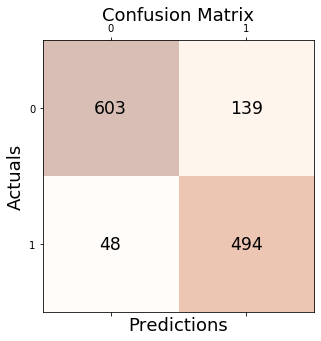

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


clf_model = LogisticRegression().fit(X_train, y_train)
y_pred=clf_model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.780


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.911


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.854


In [ ]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.841


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7328660436137072


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


clf_model = LogisticRegression().fit(X_train, y_train)
y_pred=clf_model.predict(X_test)
